UNIVERSIDAD DE NARIÑO
INGENIERIA DE SISTEMAS



                                Taller 2 Árboles de Decisión
                                
PRESENTADO POR : PABLO NARVAEZ

In [84]:
import pandas as pd

In [85]:

data=pd.read_csv('./Saber_pro.csv', sep=';') 


1.1.0     	Prepare el conjunto de datos elimine los valores incompletos para este conjunto de datos y transforme las variables categóricas a dummies.

In [86]:
#muestra donde existen datos imcompletos
display(data.isnull().sum())
#borra los datos imcompletos
data=data.dropna(axis = 0)


nota                            0
genero                          0
estu_edad_examen               67
estado_civil                    0
estu_hogar_actual               0
estu_sn_cabeza_fmlia            0
estu_pers_cargo                66
fami_nivel_educa_padres         0
fami_ocup_padre                 0
fami_ocup_madre                 0
inst_tipo                       0
inst_caracter_academico         0
inst_acreditada                 0
prog_acreditado                 0
inst_programa_zona              0
estu_metodo_prgm                0
estu_area_conoc                 0
area_grupo_referencia           0
estu_pje_creditos              96
estu_titulo_bto                 0
estu_financiacion_matricula     0
estu_estrato                    0
fami_nivel_sisben               0
econ_condicion_vivienda         0
eco_condicion_hogar             0
eco_condicion_transporte        0
eco_condicion_tic               0
eco_condicion_vive             68
fami_ing_fmliar_mensual         0
estu_trabaja  

In [87]:
X = data.drop(labels=['nota'],axis=1)

Y = data['nota']
Y = Y.str.replace('SOBRE LA MEDIA','1')
Y = Y.replace('BAJO LA MEDIA','0')
display(Y)


0        0
1        1
2        0
3        0
4        0
        ..
77644    0
77645    0
77646    1
77647    0
77648    0
Name: nota, Length: 77419, dtype: object

In [88]:
df_dummies=pd.get_dummies(X)
display(df_dummies)

,estu_edad_examen,num_estu_zona,num_instituciones_zona,genero_F,genero_M,estado_civil_CASADO(A),estado_civil_SEPARADO(A) Y/O DIVORCIADO,estado_civil_SOLTERO(A),estado_civil_UNION LIBRE,estado_civil_VIUDO(A),...,fami_ing_fmliar_mensual_CUATRO SALARIOS,fami_ing_fmliar_mensual_DOS SALARIOS,fami_ing_fmliar_mensual_SEIS SALARIOS,fami_ing_fmliar_mensual_SIETE SALARIOS,fami_ing_fmliar_mensual_TRES SALARIOS,fami_ing_fmliar_mensual_UN SALARIO,estu_trabaja_NO,"estu_trabaja_SI, PARA ADQUIRIR EXPERIENCIA Y/O RECURSOS PARA SUS GASTOS PERSONALES","estu_trabaja_SI, PARA CONTRIBUIR A PAGAR SU MATRICULA Y/O LOS GASTOS DEL HOGAR","estu_trabaja_SI, POR SER PRACTICA OBLIGATORIA DEL PROGRAMA DE ESTUDIOS"
0,24.0,13733,64,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,23.0,16500,78,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,30.0,33544,73,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,20.0,13519,56,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,34.0,13345,64,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77644,22.0,33544,73,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
77645,22.0,5283,21,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
77646,22.0,13733,64,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
77647,23.0,33544,73,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


1.1.1	Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30 (genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó). Indique que cantidad de casos quedaron para cada ambiente.

La semilla escogida es 0(random_state=0).

In [89]:
mayor_media=len(Y[data['nota'] == 'SOBRE LA MEDIA'])
bajo_media=len(data[data['nota'] == 'BAJO LA MEDIA'])

print(mayor_media,bajo_media)

38475 38944


In [90]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_dummies,Y,test_size=0.3,random_state=1)

print("TRAIN")
print("Sobre la media", y_train[y_train=='1'].count())
print("Bajo la media", y_train[y_train=='0'].count())

print("TEST")
print("Sobre la media", y_test[y_test=='1'].count())
print("Bajo la media", y_test[y_test=='0'].count())


TRAIN
Sobre la media 26972
Bajo la media 27221
TEST
Sobre la media 11503
Bajo la media 11723


1.1.2	Ajuste el mejor modelo posible explotando los parámetros del árbol, de una profundidad de 4,6,10 se escoje el de profundidad de 4

In [91]:

from sklearn import tree
#arbol de 4 niveles max_depth=4
modelo=tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
#modelo1=tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')
#modelo2=tree.DecisionTreeClassifier(max_depth=10,criterion='entropy')
display(modelo)
#display(modelo1)
#display(modelo2)
#entrena la variable del modelo ya que la comparacion en la grafica de la entropia
modelo.fit(X_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
modelo=tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

modelo.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 1.1.3	Visualizar el árbol generado y explicar dos reglas de este que mas le llamen la atención.

1. Para el  nodo raiz
Encontramos que de una muestra de 54193 existen 27256 que no tiene como area de conocimiento INGENIERÍA,ARQUITECTURA Y URBANISMO Y AFINES mientras que 26937 SI tiene como area de conocimiento INGENIERÍA,ARQUITECTURA Y URBANISMO Y AFINES,
con entropia con valor de 1, que nos dice que el desorden de los datos esta al maximo

2. Para el siguiente nivel
Para el nodo true, de la parte izquierda tenemos que de los 54193 existen 42612 que no tiene como area de conocimiento INGENIERÍA,ARQUITECTURA Y URBANISMO Y AFINES, y de los 42612 existen 23939 de INSTITUCIONES NO ACREDITADAS y 18673 de instituciones acreditadas, con entropia con valor de 0.989, que nos dice que el desorden de los datos es muy alto.

Para el nodo false de la derecha  tenemos que de 54193 existen 11581 que  tiene como area de conocimiento INGENIERÍA,ARQUITECTURA Y URBANISMO Y AFINES, y que de 11581 existen 3317 de INSTITUCIONES ACREDITADAS y 8264 de instituciones no acreditadas, con entropia con valor de 0.864, que nos dice que el desorden de los datos es  alto.

(ver imagen anexo1.png)

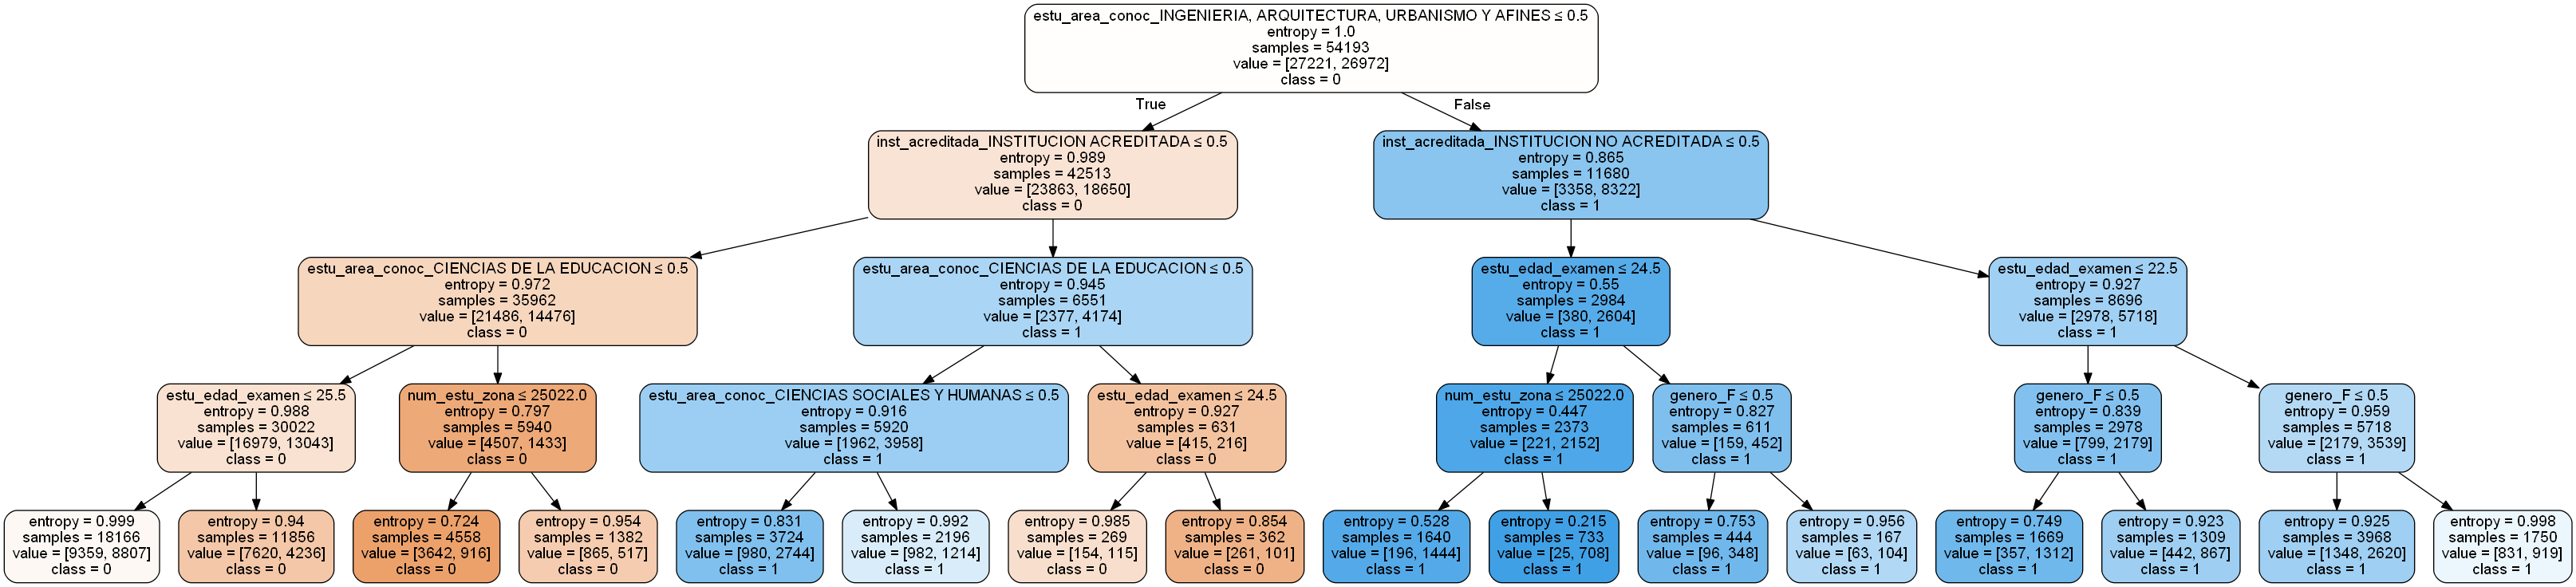

In [93]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

1.1.4	Obtener la matriz de confusión tanto para el ambiente de entrenamiento como de validación.
1.1.5	Calcular la accuracy en ambiente de entrenamiento y validación.

In [94]:
#Esta parte es para validar bajo la metrica
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score



#predict test
y_pred_test=modelo.predict(X_test)
#predict train
#Que tanto predice los datos que miro
y_pred_train=modelo.predict(X_train)

display('Test:',confusion_matrix(y_test,y_pred_test))
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_test).ravel()
print("verdaderos positivos",tp)
print("verdaderos negativos",tn)
print("falsos positivos",fp)
print("falsos negativos",fn)
ac=(tp+tn)/(tp+tn+fn+fp)
print("performance", ac)

#forma resumida de lo anterior
print("accuracy test",accuracy_score(y_test,y_pred_test))
print("accuracy train",accuracy_score(y_train,y_pred_train))


'Test:'

array([[9461, 2262],
       [6329, 5174]], dtype=int64)

verdaderos positivos 5174
verdaderos negativos 9461
falsos positivos 2262
falsos negativos 6329
performance 0.6301128046155171
accuracy test 0.6301128046155171
accuracy train 0.6307272156920636


1.1.6	Calcular el AUC y el gráfico ROC en entrenamiento y validación.


AUC test: 0.69


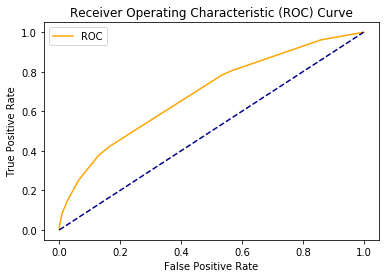

,estu_edad_examen,num_estu_zona,num_instituciones_zona,genero_F,genero_M,estado_civil_CASADO(A),estado_civil_SEPARADO(A) Y/O DIVORCIADO,estado_civil_SOLTERO(A),estado_civil_UNION LIBRE,estado_civil_VIUDO(A),...,fami_ing_fmliar_mensual_TRES SALARIOS,fami_ing_fmliar_mensual_UN SALARIO,estu_trabaja_NO,"estu_trabaja_SI, PARA ADQUIRIR EXPERIENCIA Y/O RECURSOS PARA SUS GASTOS PERSONALES","estu_trabaja_SI, PARA CONTRIBUIR A PAGAR SU MATRICULA Y/O LOS GASTOS DEL HOGAR","estu_trabaja_SI, POR SER PRACTICA OBLIGATORIA DEL PROGRAMA DE ESTUDIOS",predicho,predicho_prob_1,predicho_prob_0,real
42159,24.0,33544,73,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0.484807,0.515193,0
48826,26.0,13345,64,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0.660282,0.339718,1
11460,22.0,33544,73,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0.484807,0.515193,1
43997,22.0,13519,56,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0.880488,0.119512,1
76002,22.0,33544,73,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0.736842,0.263158,1
344,21.0,13733,64,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0.880488,0.119512,1
42142,22.0,13345,64,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0.786099,0.213901,1
56974,27.0,33544,73,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.374096,0.625904,0
41400,23.0,13519,56,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0.484807,0.515193,0
73629,20.0,33544,73,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0.484807,0.515193,1


In [95]:
#AUC curva ROC
#GRAFICO DE ROC EN ENTRENAMIENTO
#--------------------------------------------------
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    
probs_test = modelo.predict_proba(X_test)    

data_set_test=X_test.copy()
data_set_test['predicho']=y_pred_test
data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['real']=y_test

auc_test = roc_auc_score(y_test, data_set_test['predicho_prob_1'])
print('AUC test: %.2f' % auc_test)


y_true='1' <= y_test

fpr, tpr, thresholds = roc_curve(y_true, data_set_test['predicho_prob_1'])

plot_roc_curve(fpr, tpr)
display(data_set_test.head(10))

AUC train: 0.69


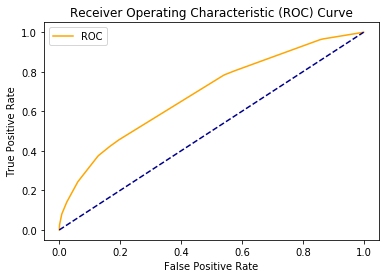

,estu_edad_examen,num_estu_zona,num_instituciones_zona,genero_F,genero_M,estado_civil_CASADO(A),estado_civil_SEPARADO(A) Y/O DIVORCIADO,estado_civil_SOLTERO(A),estado_civil_UNION LIBRE,estado_civil_VIUDO(A),...,fami_ing_fmliar_mensual_TRES SALARIOS,fami_ing_fmliar_mensual_UN SALARIO,estu_trabaja_NO,"estu_trabaja_SI, PARA ADQUIRIR EXPERIENCIA Y/O RECURSOS PARA SUS GASTOS PERSONALES","estu_trabaja_SI, PARA CONTRIBUIR A PAGAR SU MATRICULA Y/O LOS GASTOS DEL HOGAR","estu_trabaja_SI, POR SER PRACTICA OBLIGATORIA DEL PROGRAMA DE ESTUDIOS",predicho,predicho_prob_1,predicho_prob_0,real
76987,20.0,13519,56,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0.484807,0.515193,0
35096,47.0,33544,73,0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0.357287,0.642713,0
13725,24.0,13345,64,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0.484807,0.515193,0
42083,22.0,33544,73,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.484807,0.515193,1
38972,21.0,16500,78,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.484807,0.515193,0
24431,20.0,33544,73,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0.484807,0.515193,0
62803,23.0,16500,78,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.484807,0.515193,0
13145,21.0,13345,64,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0.662338,0.337662,0
67159,24.0,33544,73,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0.484807,0.515193,0
67519,25.0,33544,73,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.484807,0.515193,0


In [96]:
#GRAFICO DE ROC EN VALIDACIÓN
#-------------------------------------------

probs_train = modelo.predict_proba(X_train)    

data_set_train=X_train.copy()
data_set_train['predicho']=y_pred_train
data_set_train['predicho_prob_1']=probs_train[:,1]
data_set_train['predicho_prob_0']=probs_train[:,0]
data_set_train['real']=y_train

auc_train = roc_auc_score(y_train, data_set_train['predicho_prob_1'])
print('AUC train: %.2f' % auc_train)


y_true='1' <= y_train

fpr, tpr, thresholds = roc_curve(y_true, data_set_train['predicho_prob_1'])

plot_roc_curve(fpr, tpr)
display(data_set_train.head(10))

1.1.7	Utilizar el conjunto de entrenamiento calcule el promedio de AUC y accuracy con el método de validación cruzada con 10 folds o particiones.

[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


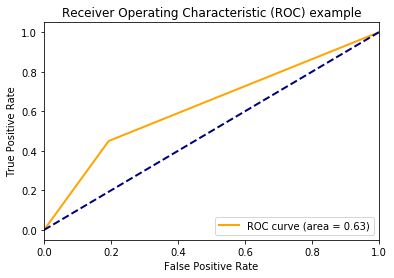

0.6284208417300602

In [97]:
#armar la curva de roc para este modelo
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def my_roc(y_real,y_pred):
    y_real =label_binarize(y_real, classes=['0', '1'])
    y_pred =label_binarize(y_pred, classes=['0', '1'])
    print(y_real)
    fpr, tpr, _ = roc_curve(y_real.ravel(), y_pred.ravel())
    roc_auc=auc(fpr,tpr)
    
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color='orange', 
        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) example')
    plt.legend(loc="lower right")
    plt.show()
    return (roc_auc)

my_roc(y_test,y_pred_test)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


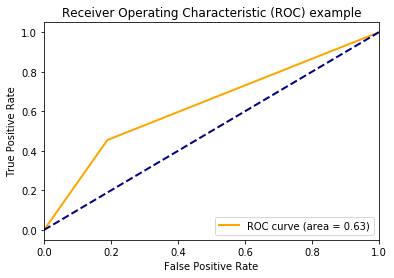

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


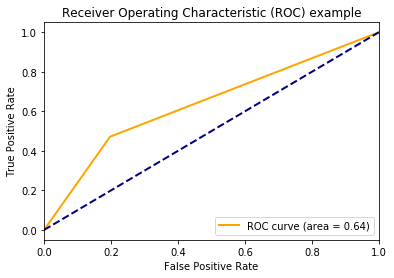

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


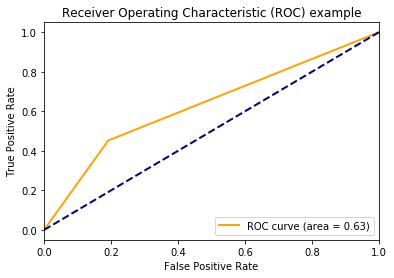

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


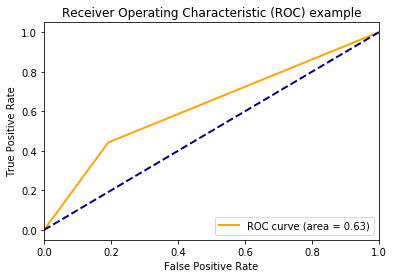

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


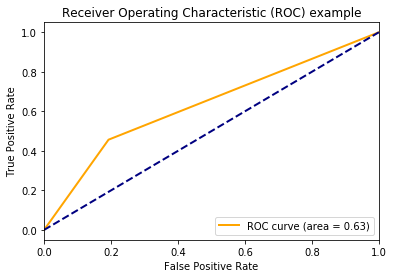

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


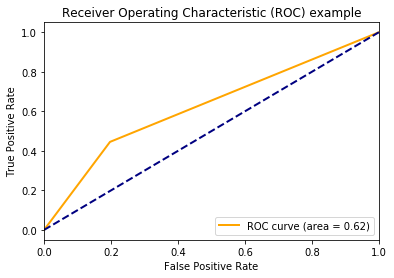

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


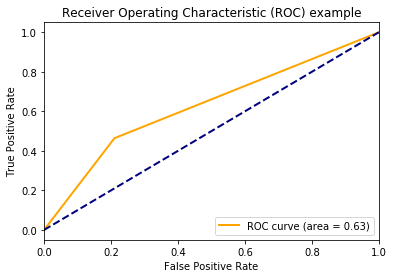

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


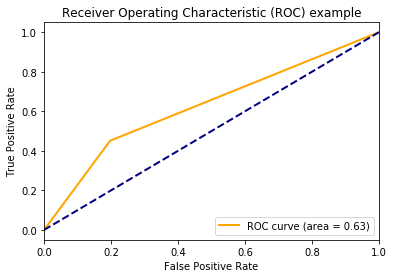

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


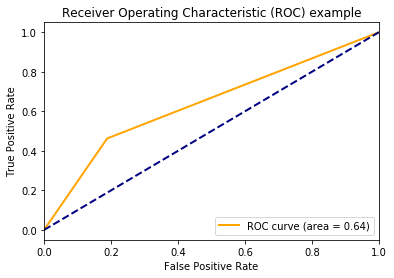

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


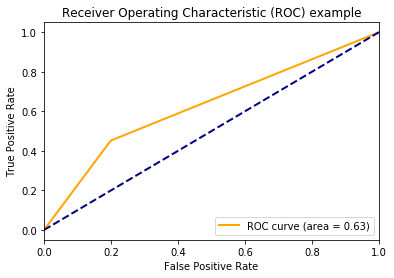

0.6299243958436287


In [98]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=False)

aucs = []
for train,test in cv.split(X_train,y_train):
    m=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')
    m.fit(X_train.iloc[train],y_train.iloc[train])
    aucs.append(my_roc(y_train.iloc[test],
                m.predict(X_train.iloc[test])       
                ))
print(sum(aucs)/len(aucs) )   

1.1.8	Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la siguiente lógica. Entregue los resultados indicados:
•	Al azar e indique la cantidad de individuos que están por encima de la media.
•	Utilizando el modelo desarrollado en el punto 1.1.2 e indique la cantidad de individuos que están por encima de la media.


In [99]:
X_test_75, X_test_25, y_test_75, y_test_25 = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


print ("total 25%",y_test_25.count())
print("Estan: SOBRE LA MEDIA test 25% azar",y_test_25[y_test_25=='1'].count())


y_test_modelo=data_set_test.sort_values(['predicho_prob_1'], ascending=[False])[1:y_test_25.count()]
print("Estan: SOBRE LA MEDIA test 25% modelo",len(y_test_modelo[y_test_modelo['real'] == '1']))


total 25% 5807
Estan: SOBRE LA MEDIA test 25% azar 2908
Estan: SOBRE LA MEDIA test 25% modelo 4309


1.1.9	Lea el conjunto de datos Saber_pro_predecir.csv utilice el modelo generado para predecir los registros de este archivo, genere archivo.csv con los resultados de las predicciones de su modelo y enviarlo por vía mail.

In [100]:
df_predecir=pd.read_csv('./Saber_pro_predecir.csv', sep=';')  

#display(df_predecir.isnull().sum())
#display(df_predecir.describe())
df_predecir["estu_edad_examen"]=df_predecir["estu_edad_examen"].replace(np.nan, 
                                df_predecir["estu_edad_examen"].mean())
#df_predecir["estu_pers_cargo"]=df_predecir["estu_pers_cargo"].replace(np.nan, df_predecir["estu_pers_cargo"].mode())

df_predecir["estu_pers_cargo"].fillna(value=
                                      df_predecir["estu_pers_cargo"].mode()[0],
                                      inplace =True)
df_predecir["estu_pje_creditos"].fillna(value=df_predecir["estu_pje_creditos"].mode()[0],inplace =True)
df_predecir["eco_condicion_vive"].fillna(value=df_predecir["eco_condicion_vive"].mode()[0],inplace =True)
df_dummies_predic=pd.get_dummies(df_predecir)
#display(df_predecir.isnull().sum())
i=0
while i<len(X_train.columns):
    if X_train.columns[i] not in df_dummies_predic.columns:
        df_dummies_predic[X_train.columns[i]]=0
    i=i+1

In [101]:

y_modelo=modelo.predict(df_dummies_predic)

In [103]:
import pandas as pd

prediccion=pd.DataFrame()
prediccion['y']=y_modelo
#display(prediccion["y"].unique())
prediccion.to_csv('prediccion_resul.csv')



array(['0', '1'], dtype=object)